In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import utils

In [84]:
train = pd.read_csv('MNIST/mnist_train.csv')
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
test =pd.read_csv('MNIST/mnist_test.csv')
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
train.isnull().sum().sum()
x_train

0

In [122]:
x_train = train.drop(['label'],axis=1).values
x_train.shape

(60000, 784)

In [88]:
x_train=x_train/255.0
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
y_train=train['label'].values
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

Define the Network Architecture

In [99]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.1,momentum=0.9,nesterov=0.1)

In [100]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
indrajit=model.fit(x_train,y_train,validation_split=0.99,epochs=11,batch_size=512)

Epoch 1/11
2/2 [==============================] - 1s 721ms/step - loss: 0.6587 - accuracy: 0.7900 - val_loss: 0.8383 - val_accuracy: 0.7339
Epoch 2/11
2/2 [==============================] - 1s 516ms/step - loss: 0.5552 - accuracy: 0.8183 - val_loss: 0.7463 - val_accuracy: 0.7751
Epoch 3/11
2/2 [==============================] - 0s 471ms/step - loss: 0.4627 - accuracy: 0.8550 - val_loss: 0.6847 - val_accuracy: 0.7999
Epoch 4/11
2/2 [==============================] - 1s 528ms/step - loss: 0.3753 - accuracy: 0.8900 - val_loss: 0.7385 - val_accuracy: 0.7927
Epoch 5/11
2/2 [==============================] - 1s 523ms/step - loss: 0.3336 - accuracy: 0.9083 - val_loss: 0.6984 - val_accuracy: 0.8040
Epoch 6/11
2/2 [==============================] - 1s 498ms/step - loss: 0.2844 - accuracy: 0.9083 - val_loss: 0.7423 - val_accuracy: 0.8097
Epoch 7/11
2/2 [==============================] - 0s 466ms/step - loss: 0.2499 - accuracy: 0.9267 - val_loss: 0.7538 - val_accuracy: 0.7984
Epoch 8/11
2/2 [====

In [103]:
x_test=test.drop(['label'],axis=1).values
y_test=test['label'].values
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [104]:
x_test=x_test/255.0

In [105]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.8386


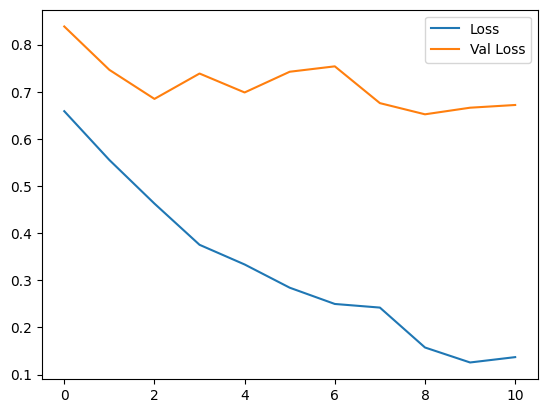

In [106]:
plt.plot(indrajit.history['loss'],label="Loss")
plt.plot(indrajit.history['val_loss'],label="Val Loss")
plt.legend()
plt.show()

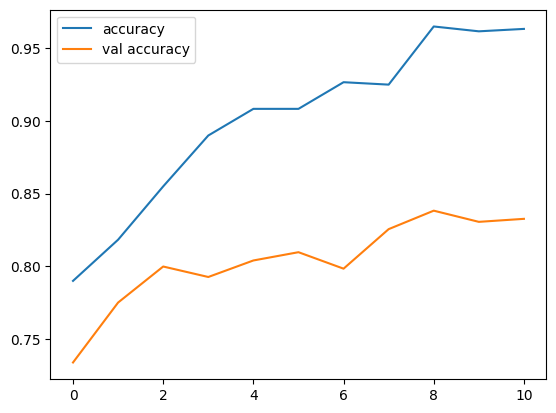

In [107]:
plt.plot(indrajit.history['accuracy'],label="accuracy")
plt.plot(indrajit.history['val_accuracy'],label="val accuracy")
plt.legend()
plt.show()

In [113]:
pred = model.predict(x_test)
pred

313/313 [==============================] - 0s 1ms/step


array([[1.16508318e-06, 1.60702612e-07, 4.75537818e-04, ...,
        9.99499202e-01, 4.21546247e-08, 8.80837979e-06],
       [1.29764415e-02, 2.38846205e-02, 3.65405172e-01, ...,
        7.25450751e-04, 1.67835951e-02, 1.13663496e-03],
       [1.79460051e-06, 9.99098301e-01, 7.07667554e-04, ...,
        7.32022772e-06, 1.36862877e-06, 4.43726300e-08],
       ...,
       [8.52137347e-08, 8.16598515e-07, 1.21608380e-07, ...,
        7.42896373e-05, 2.83013040e-04, 9.63254333e-01],
       [8.98167782e-04, 7.27044279e-03, 9.16068151e-04, ...,
        4.09281376e-04, 5.91386594e-02, 1.30155534e-02],
       [3.00976893e-07, 2.57416616e-07, 8.80307653e-06, ...,
        5.66132075e-09, 2.86989210e-10, 7.58558438e-10]], dtype=float32)

In [112]:
print(np.argmax(pred,axis=1))
print(y_test)


[7 6 1 ... 9 5 6]
[7 2 1 ... 4 5 6]


313/313 [==============================] - 0s 1ms/step
1


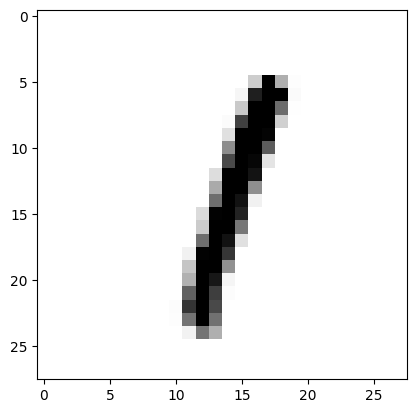

In [121]:
pred=model.predict(x_test)
idx=5
plt.imshow(x_test[idx].reshape(28,28),cmap='Greys')
print(pred[idx].argmax())